# ML using Decision Trees 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
print(pd.__version__)

0.22.0


## First Step: Load Data and disassemble for our purposes

In [4]:
df = pd.read_csv('./insurance-customers-300.csv', sep=';')

In [5]:
y=df['group']

In [6]:
df.drop('group', axis='columns', inplace=True)

In [7]:
X = df.as_matrix()

In [8]:
df.describe()

,max speed,age,thousand km per year
count,300.000000,300.000000,300.000000
mean,171.863333,44.006667,31.220000
std,18.807545,16.191784,15.411792
min,132.000000,18.000000,5.000000
25%,159.000000,33.000000,18.000000
50%,171.000000,42.000000,30.000000
75%,187.000000,52.000000,43.000000
max,211.000000,90.000000,99.000000


## Second Step: Decision Trees

In [9]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((180, 3), (180,), (120, 3), (120,))

In [13]:
X_train_kmh_age = X_train[:, :2]
X_test_kmh_age = X_test[:, :2]
X_train_2_dim = X_train_kmh_age
X_test_2_dim = X_test_kmh_age

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2.01 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
clf.tree_.max_depth

13

In [16]:
clf.predict(X_train_2_dim[0:10])

array([2, 2, 2, 1, 2, 1, 2, 2, 0, 0], dtype=int64)

In [17]:
y_train[0:10]

282    2
182    2
207    2
167    1
90     2
152    1
136    2
149    2
50     0
151    0
Name: group, dtype: int64

In [18]:
clf.predict_proba(X_train_2_dim[0:10])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

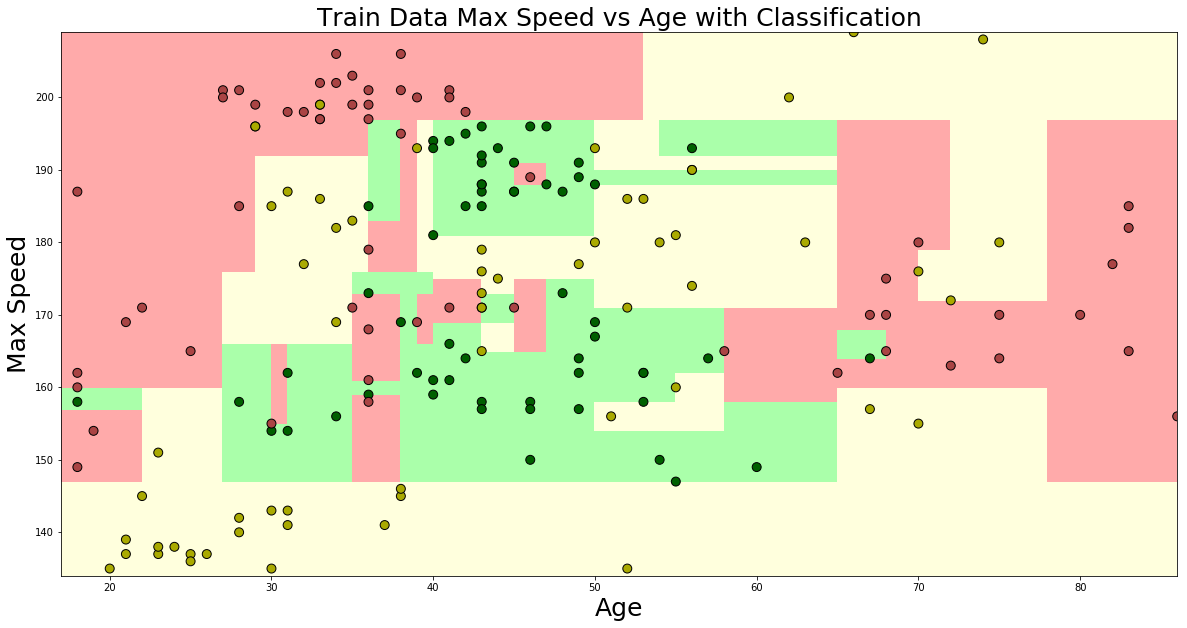

In [19]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

### Look how great it is doing!

In [20]:
clf.score(X_train_2_dim, y_train)

0.9777777777777777

### But really?

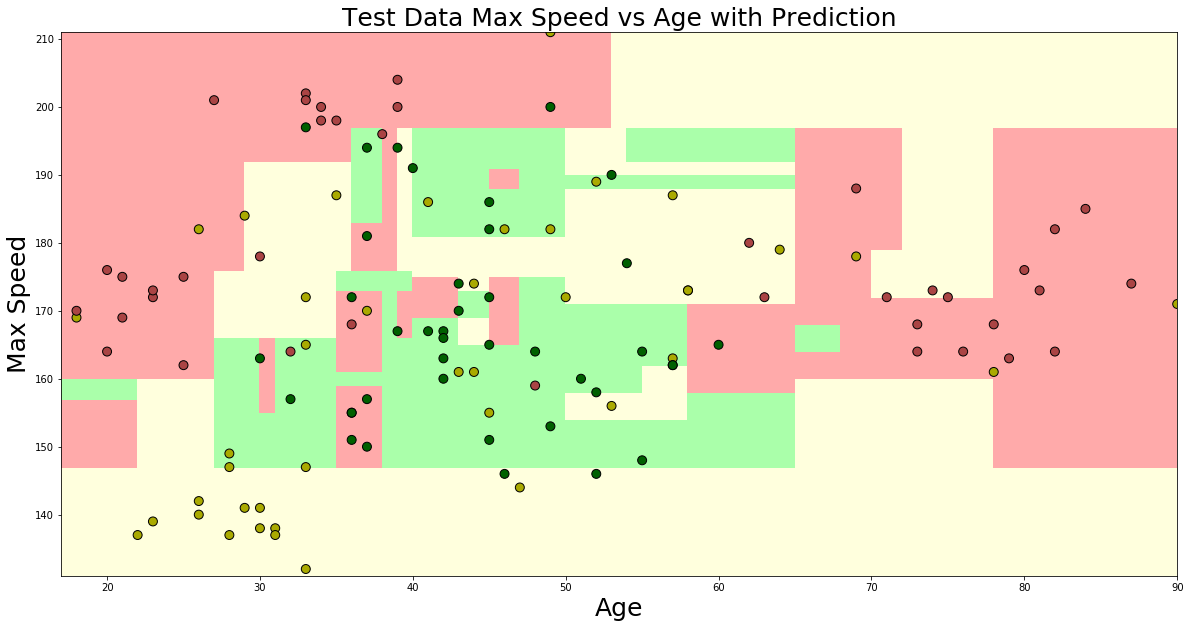

In [21]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [22]:
clf.score(X_test_2_dim, y_test)

0.6

Probably still better than our manual result, but this is clearly overfitting

## How does the decision tree look like?

In [23]:
# PDF
# Needs GraphViz installed (dot)
# http://scikit-learn.org/stable/modules/tree.html
# !conda install python-graphviz -y

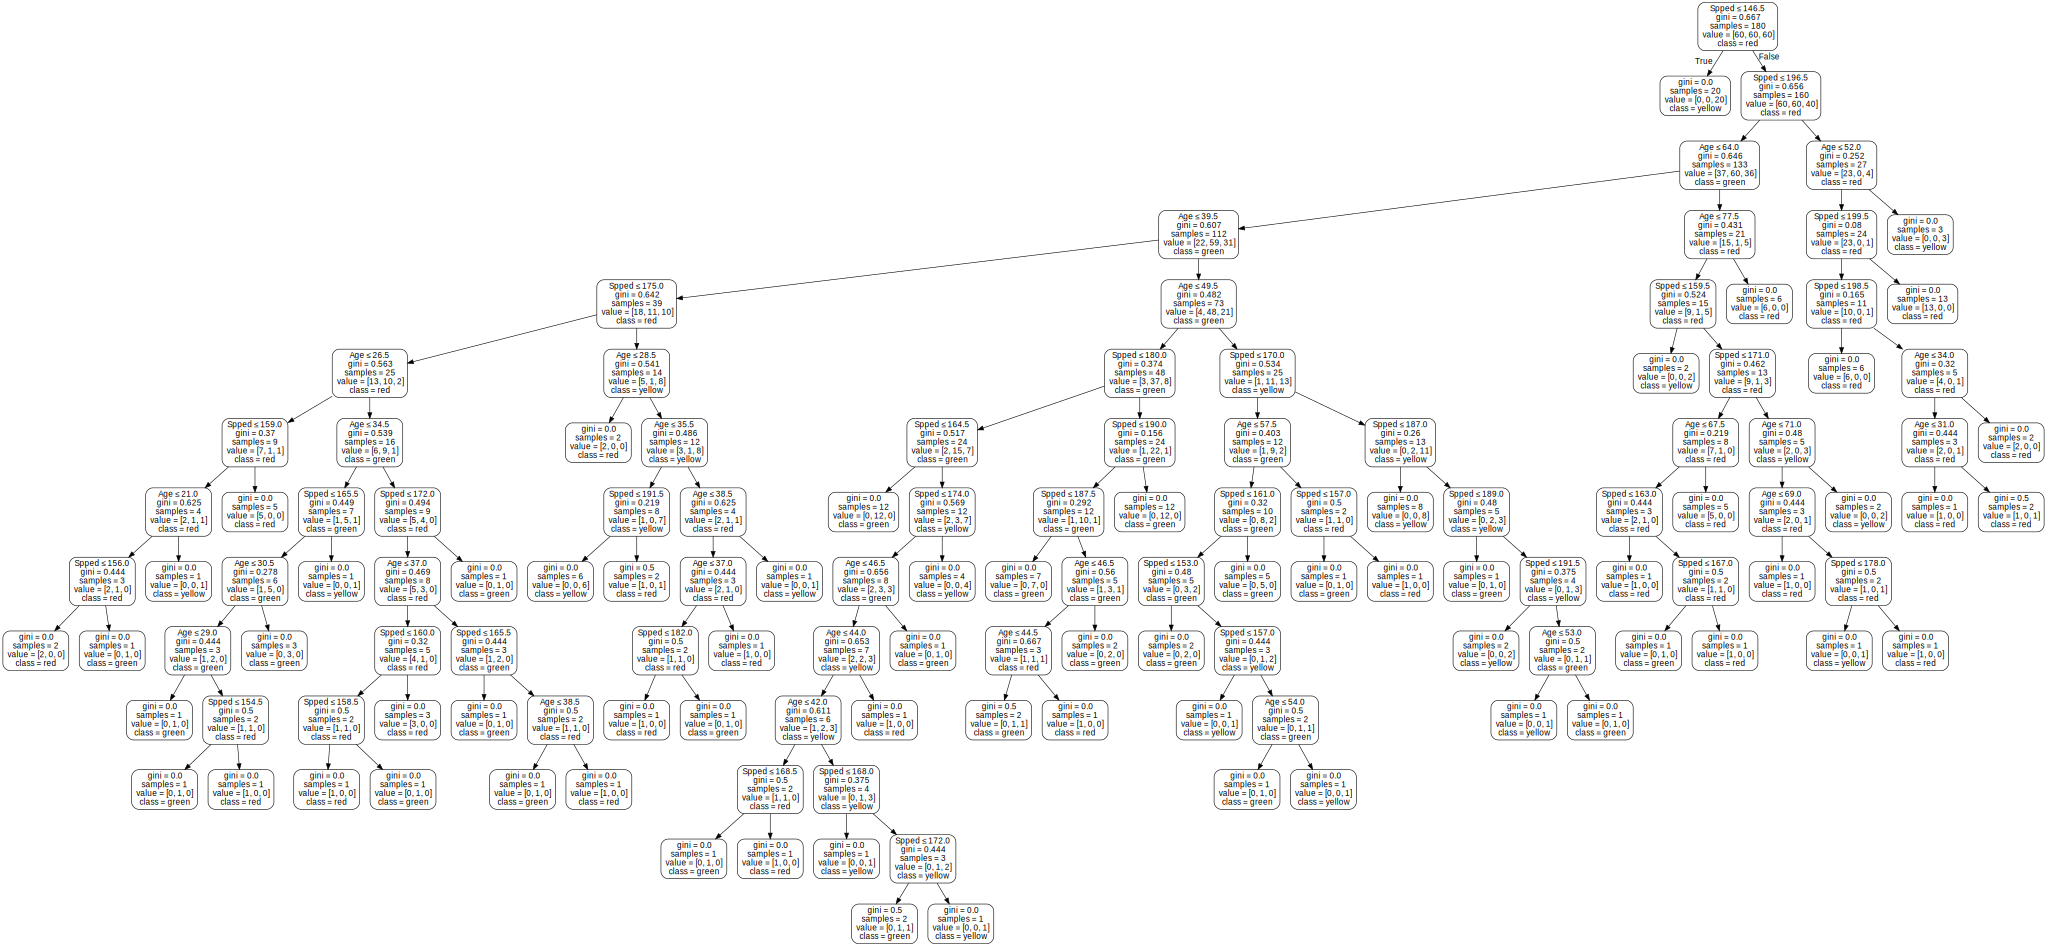

In [24]:
import graphviz 
from sklearn.tree import export_graphviz

# http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
dot_data = export_graphviz(clf, out_file=None,
                feature_names=['Spped', 'Age'],
                class_names=['red', 'green', 'yellow'],
#                 filled=True, 
                rounded=True,
                special_characters=True)

# graph = graphviz.Source(dot_data) 
# graph.render("tree") 
graphviz.Source(dot_data)

In [25]:
# this gives us nice pngs
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
# https://graphviz.gitlab.io/download/
# !conda install -c conda-forge pydotplus -y

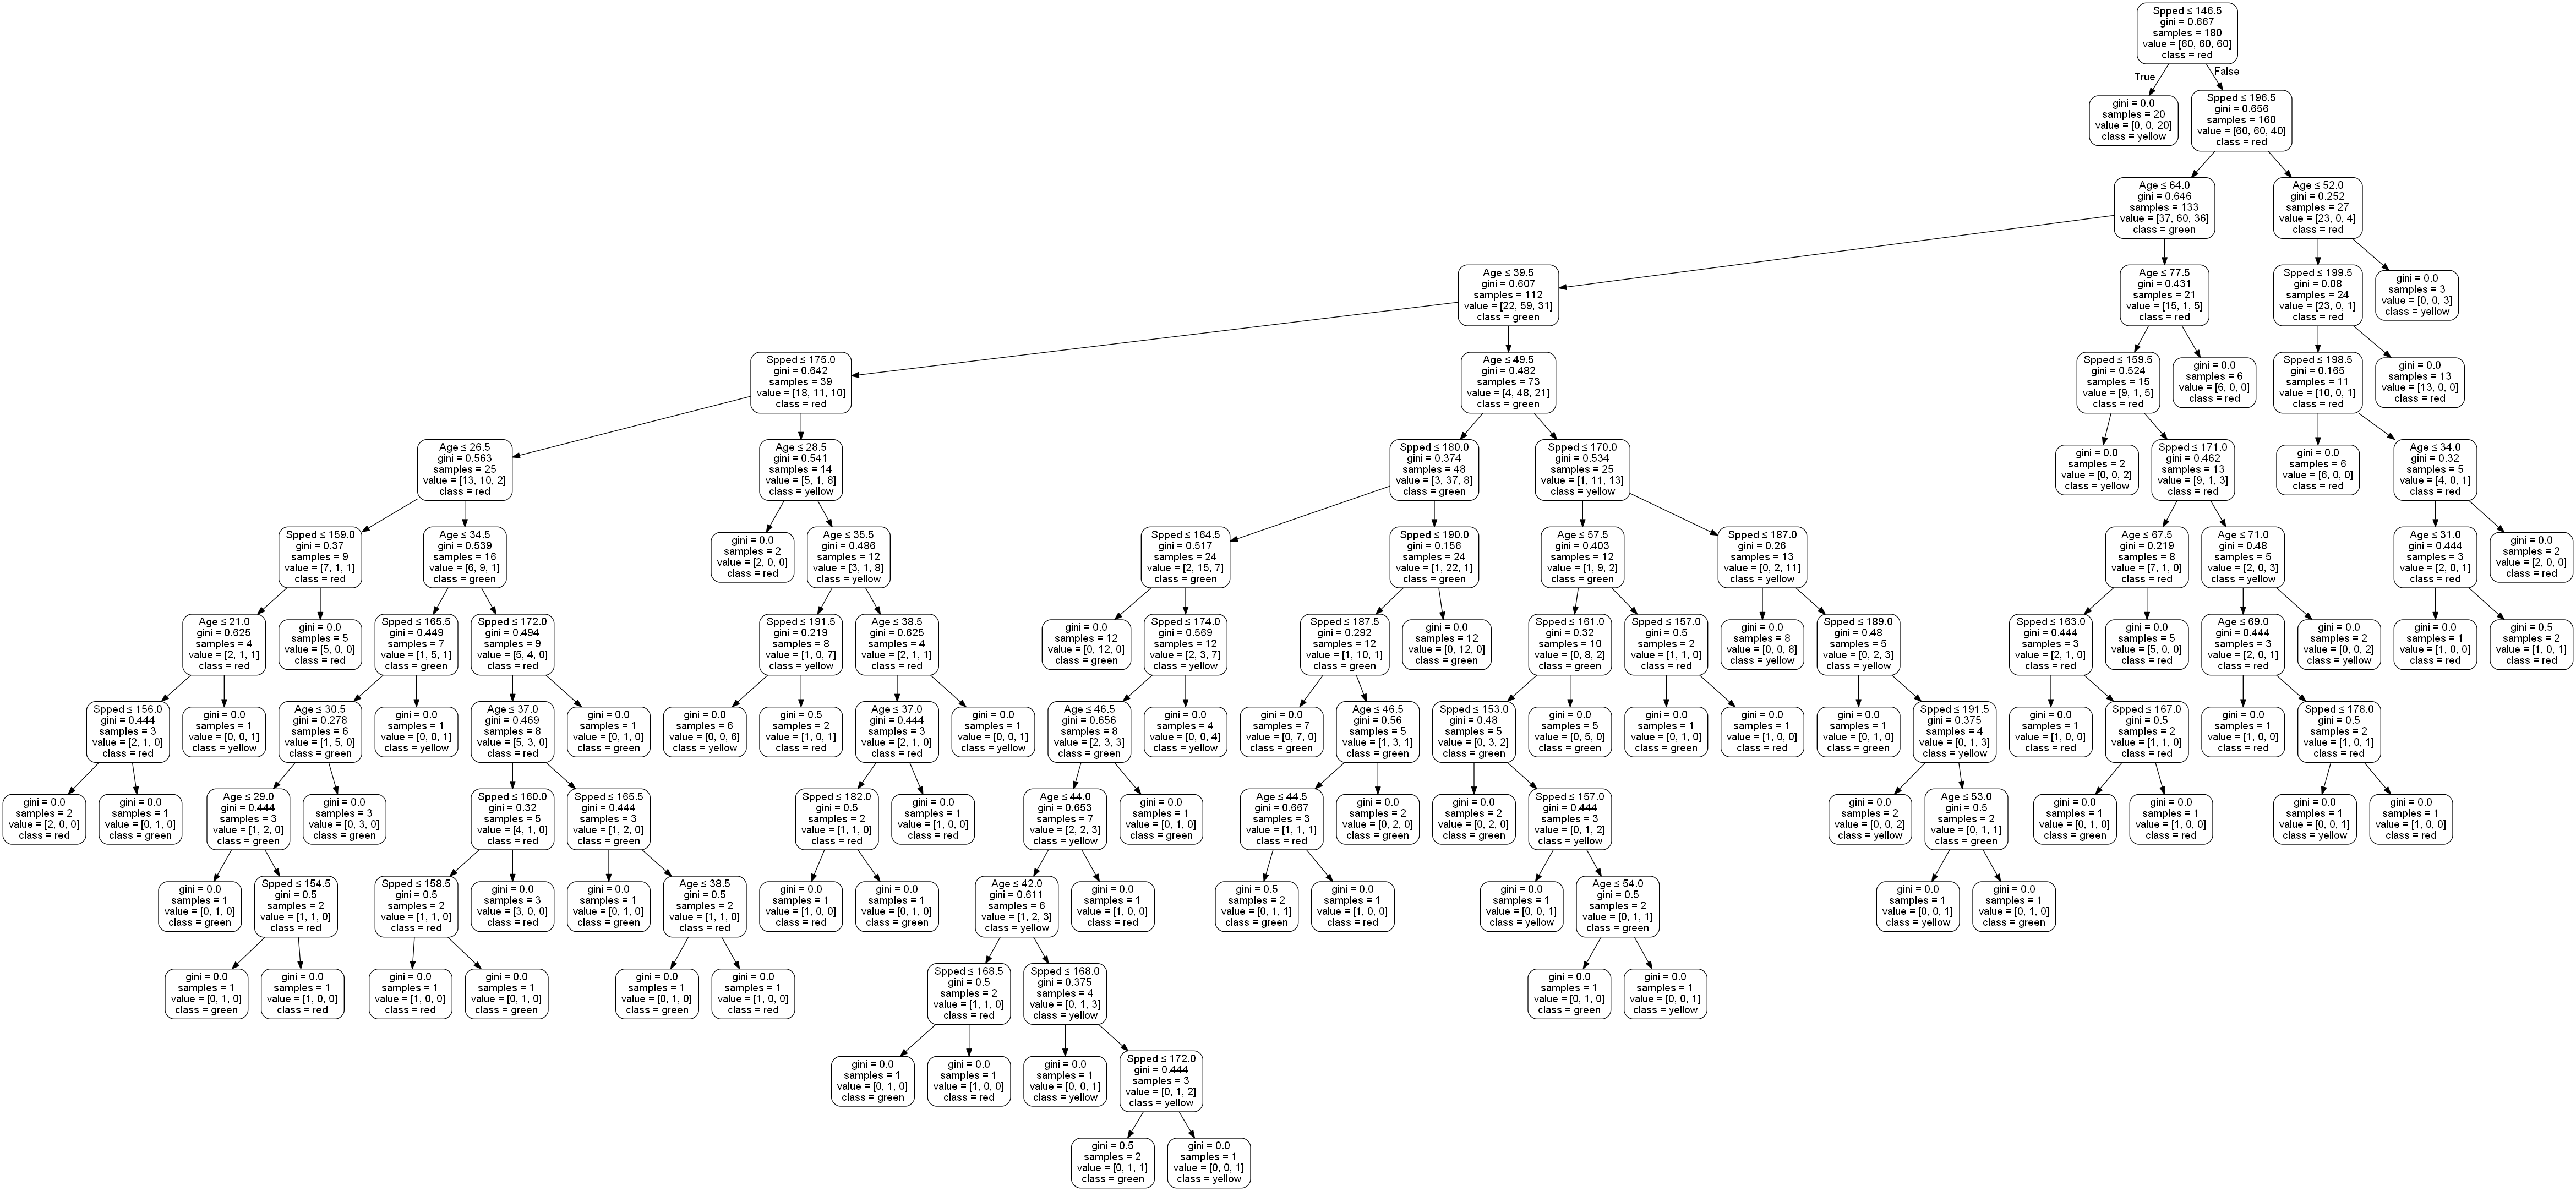

In [26]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
def plot_dt(clf):
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,
                    feature_names=['Spped', 'Age'],
                    class_names=['red', 'green', 'yellow'],
    #                 filled=True, 
                    rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

plot_dt(clf)

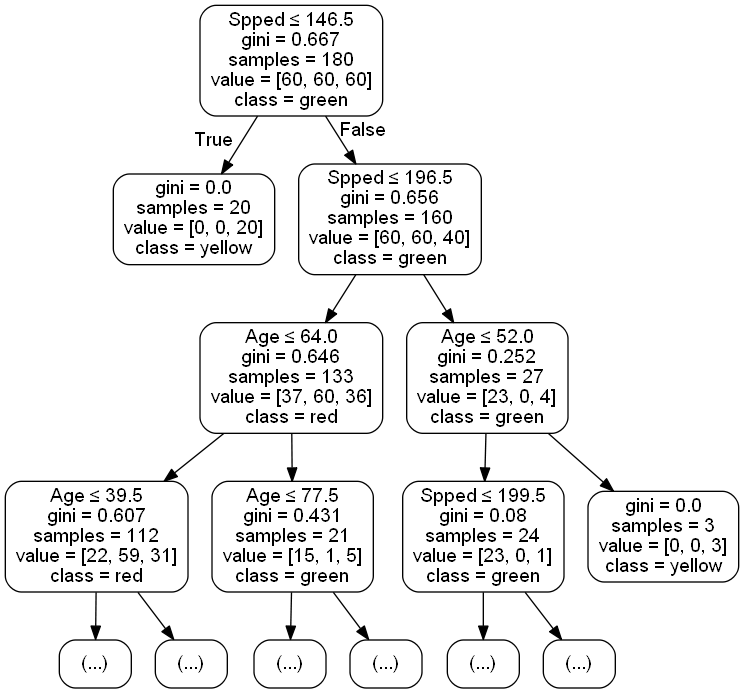

In [27]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                feature_names=['Spped', 'Age'],
                class_names=['green', 'red', 'yellow'],
#                 filled=True, 
                max_depth=3,
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Third Step: Less overfitting, paying with underfitting

In [28]:
# DecisionTreeClassifier?

In [29]:
clf = DecisionTreeClassifier(max_depth=3,
                              min_samples_leaf=10,
                              min_samples_split=20)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 998 µs


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

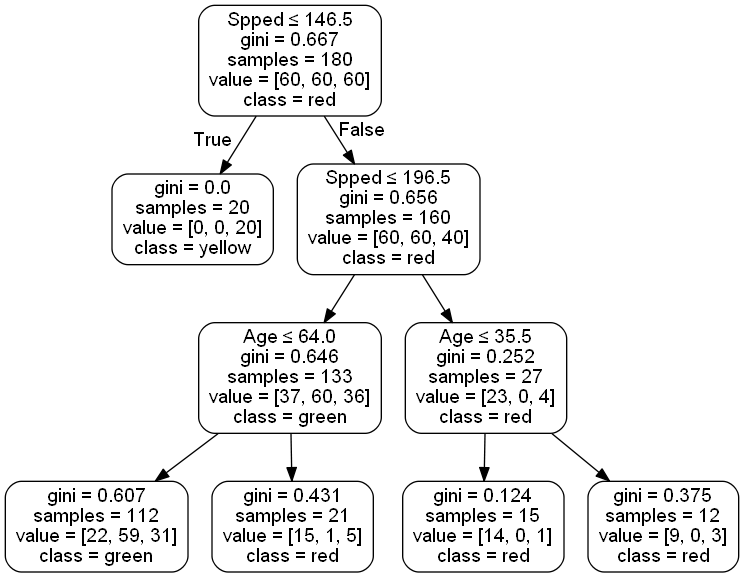

In [30]:
plot_dt(clf)

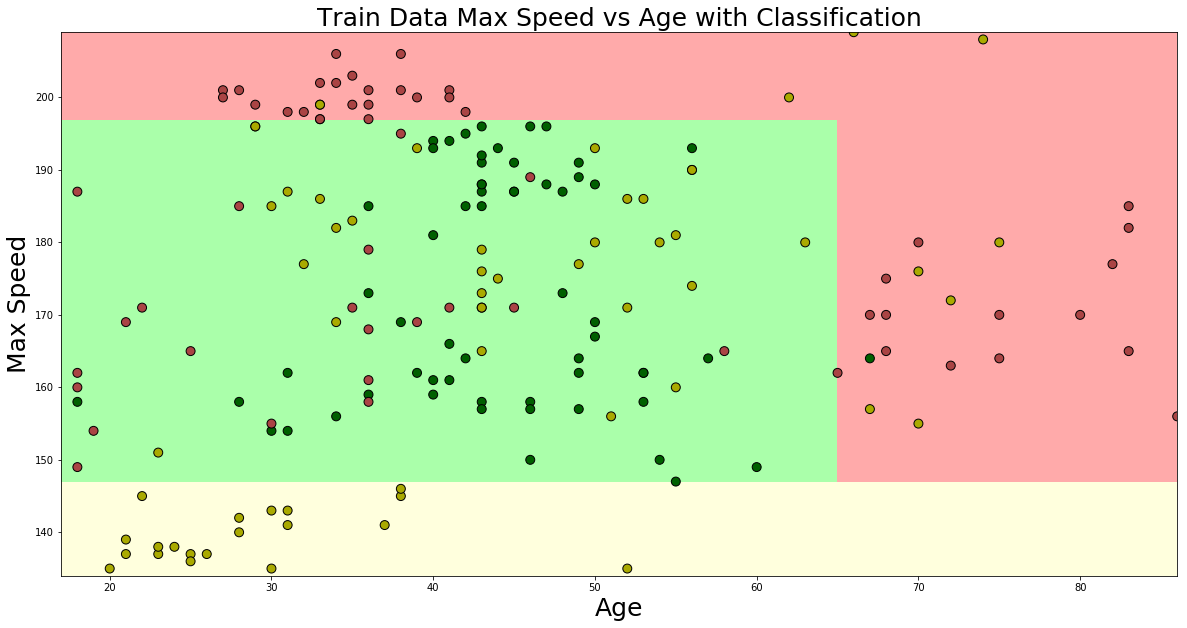

In [31]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [32]:
clf.score(X_train_2_dim, y_train)

0.65

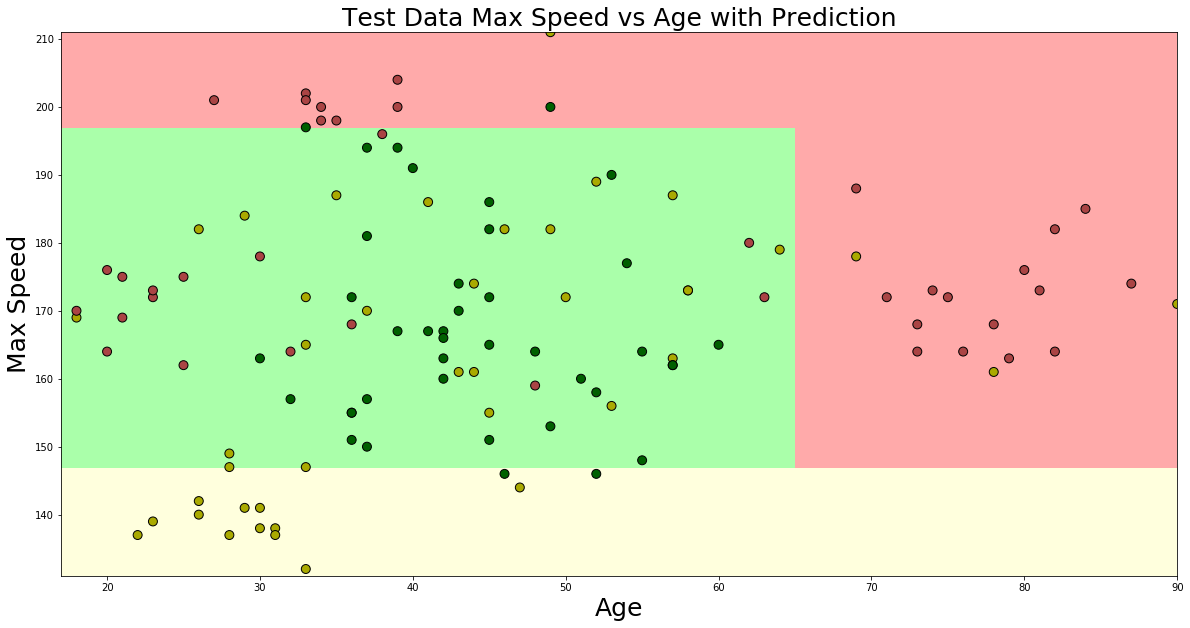

In [33]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [34]:
clf.score(X_test_2_dim, y_test)

0.5916666666666667

## Fourth Step: Ensemble Methods
* Decision Trees have the tendency to overfit
* Ensemble Methods train a number of Decision Trees and combine their output to reduce overfitting

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=4)

In [36]:
%time rf_clf.fit(X_train_2_dim, y_train)

Wall time: 222 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

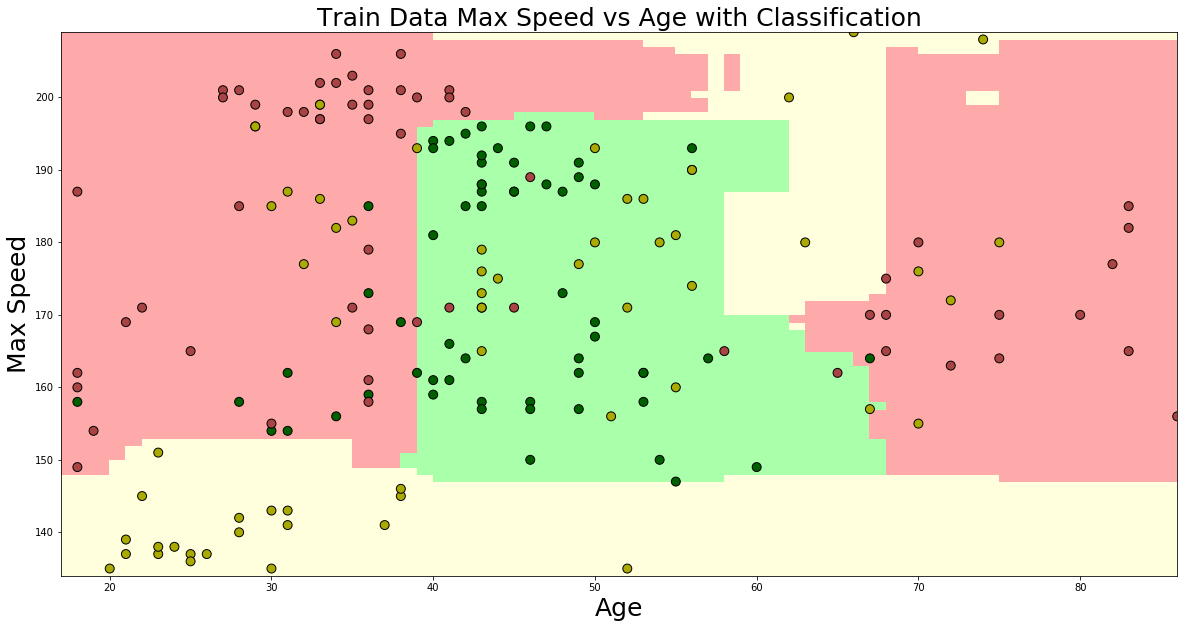

In [37]:
plotPrediction(rf_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [38]:
rf_clf.score(X_train_2_dim, y_train)

0.7111111111111111

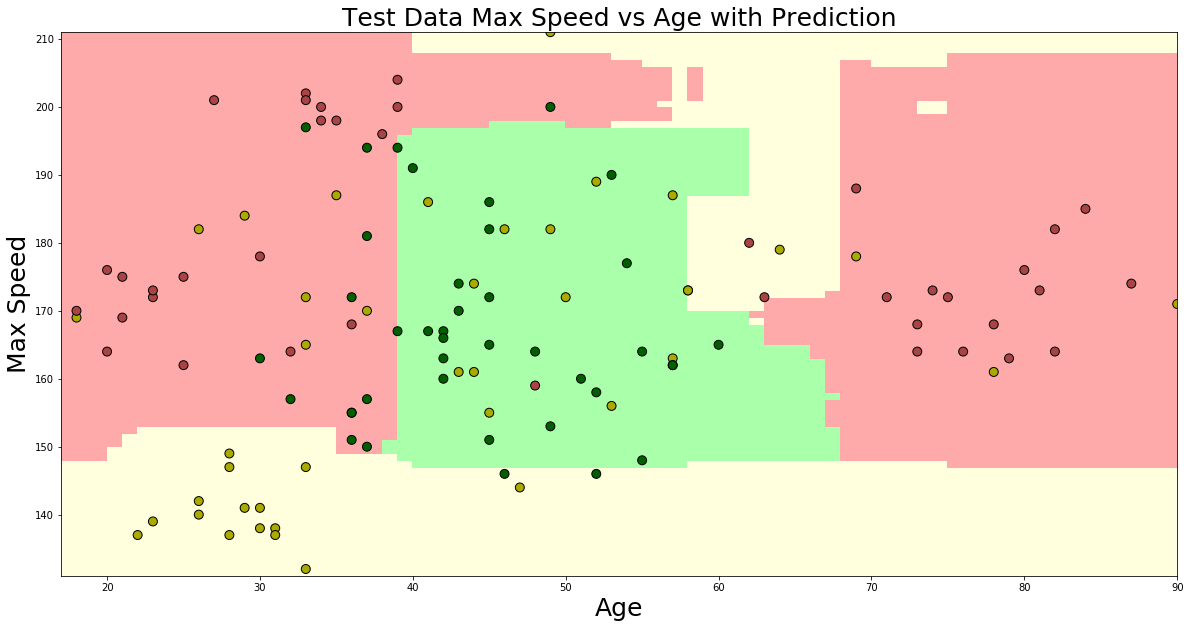

In [39]:
plotPrediction(rf_clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [40]:
rf_clf.score(X_test_2_dim, y_test)

0.6666666666666666

## Cross Validation is a way to make the score more telling
* we run the training and scoring many times (10 in our case)
* each time we use a different part of the data for validation
* this way we have many runs that take out a random factor
* additionally we use all data for training
* only works when training time is reasonably short

In [47]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [54]:
scores = cross_val_score(rf_clf, X[:, :2], y, cv=10)

In [55]:
scores

array([0.56666667, 0.66666667, 0.73333333, 0.66666667, 0.66666667,
       0.9       , 0.63333333, 0.63333333, 0.66666667, 0.63333333])

In [56]:
# https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
print("Accuracy: %0.2f (+/- %0.2f for 95 percent of runs)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.17 for 95 percent of runs)


### AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
boost_clf = AdaBoostClassifier(n_estimators=100, learning_rate=3, random_state=42)

In [42]:
%time boost_clf.fit(X_train_2_dim, y_train)

Wall time: 113 ms


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=3,
          n_estimators=100, random_state=42)

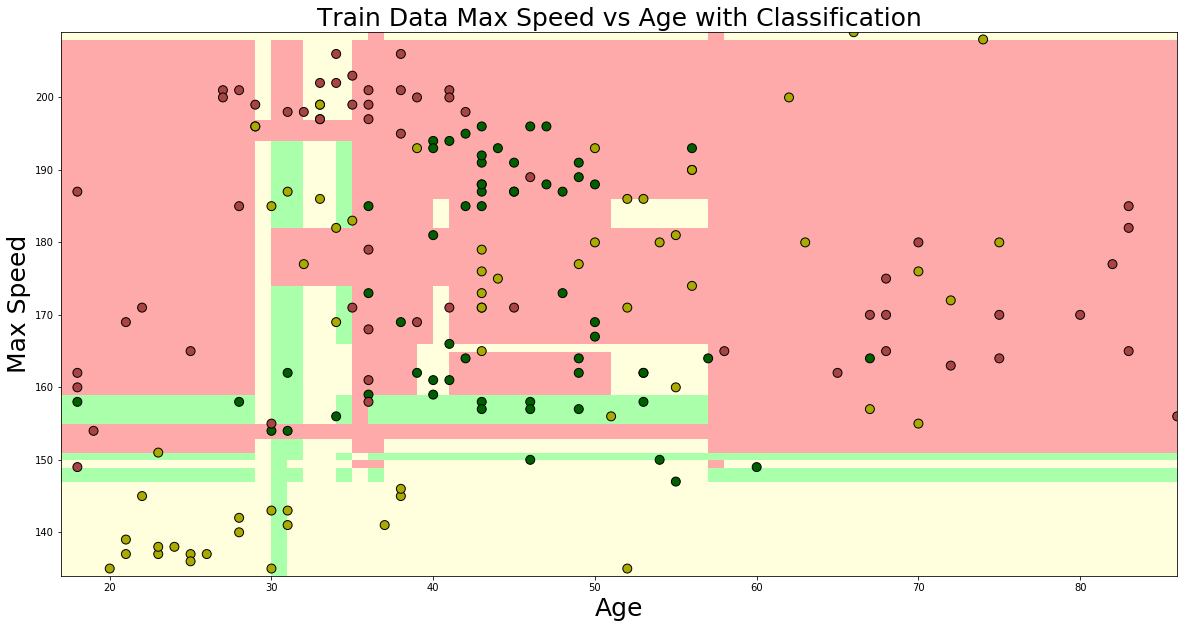

In [43]:
plotPrediction(boost_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [44]:
boost_clf.score(X_train_2_dim, y_train)

0.4722222222222222

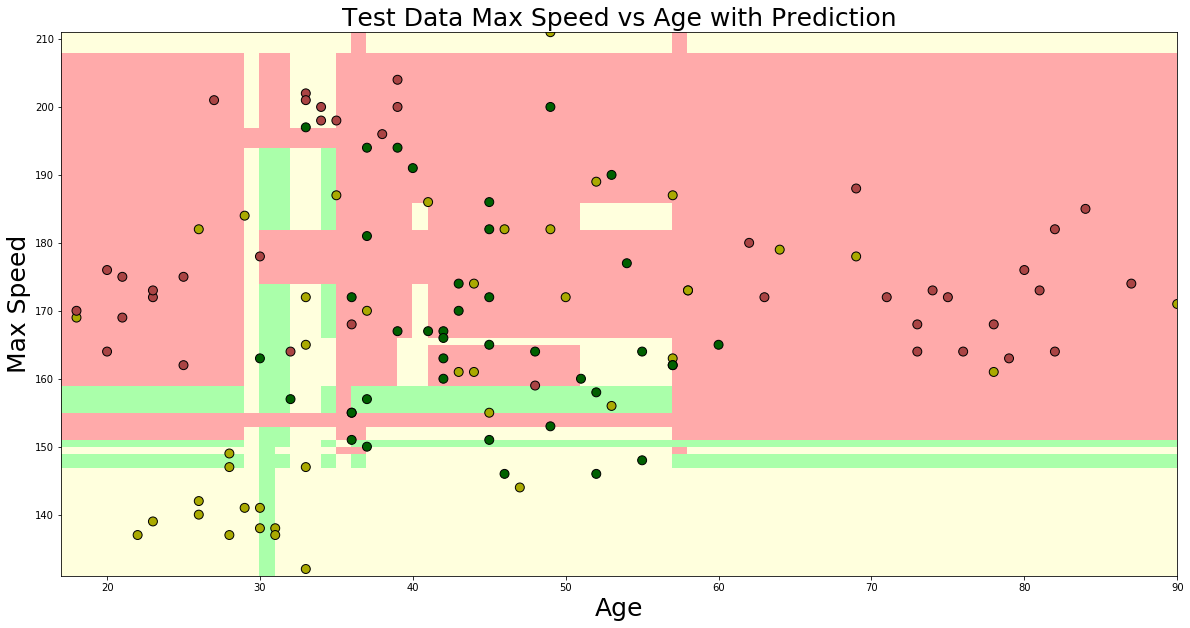

In [45]:
plotPrediction(boost_clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [46]:
boost_clf.score(X_test_2_dim, y_test)

0.475